This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/) 

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_34127/1429530752.py:1: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/cad-polito-it/byron/blob/alpha/docs/paranoia.md for details]
  import byron


Everything for the definition of the constraints (the old "instruction library") is under the namespace `byron.framework` (lazy fingers can use `byron.f`)

# Local References

In [2]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.3e}', num=byron.f.float_parameter(-1, 1))

Local references are inside the same macro bunch.

In [3]:
local_ref = byron.f.local_reference(backward=True, loop=False, forward=True)
local_ref

LocalReference[<≠>]

In [4]:
macro_jmp = byron.f.macro('jmp {target}', target=local_ref)
bunch = byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=10)

; 🖋 n1 ➜ Frame❬MacroArray#1❭
n2:
bar +8.535e-01  ; 🖋 n1.n2 ➜ Macro❬User#2❭
jmp n8  ; 🖋 n1.n3 ➜ Macro❬User#3❭
n4:
jmp n10  ; 🖋 n1.n4 ➜ Macro❬User#3❭
foo #7183  ; 🖋 n1.n5 ➜ Macro❬User#1❭
n6:
jmp n4  ; 🖋 n1.n6 ➜ Macro❬User#3❭
jmp n6  ; 🖋 n1.n7 ➜ Macro❬User#3❭
n8:
jmp n2  ; 🖋 n1.n8 ➜ Macro❬User#3❭
foo #d3df  ; 🖋 n1.n9 ➜ Macro❬User#1❭
n10:
bar +2.633e-01  ; 🖋 n1.n10 ➜ Macro❬User#2❭
bar +5.162e-01  ; 🖋 n1.n11 ➜ Macro❬User#2❭


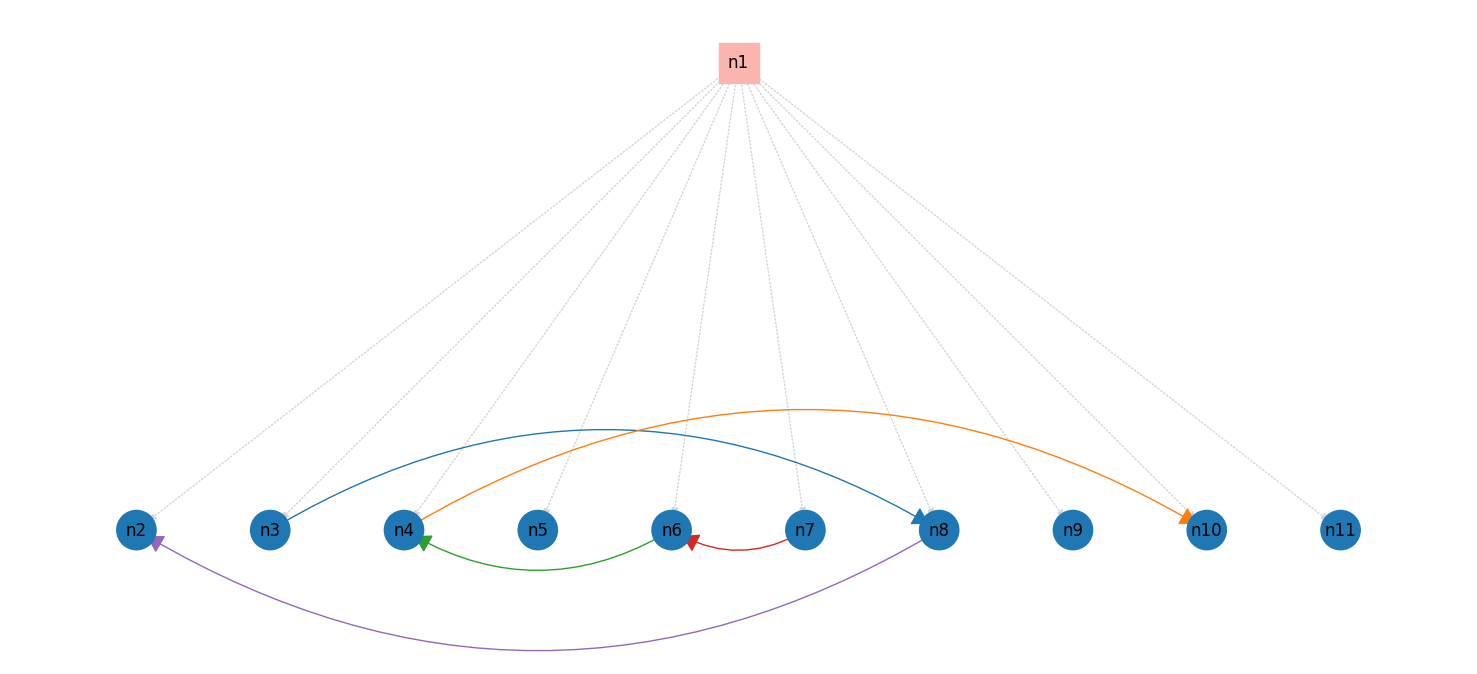

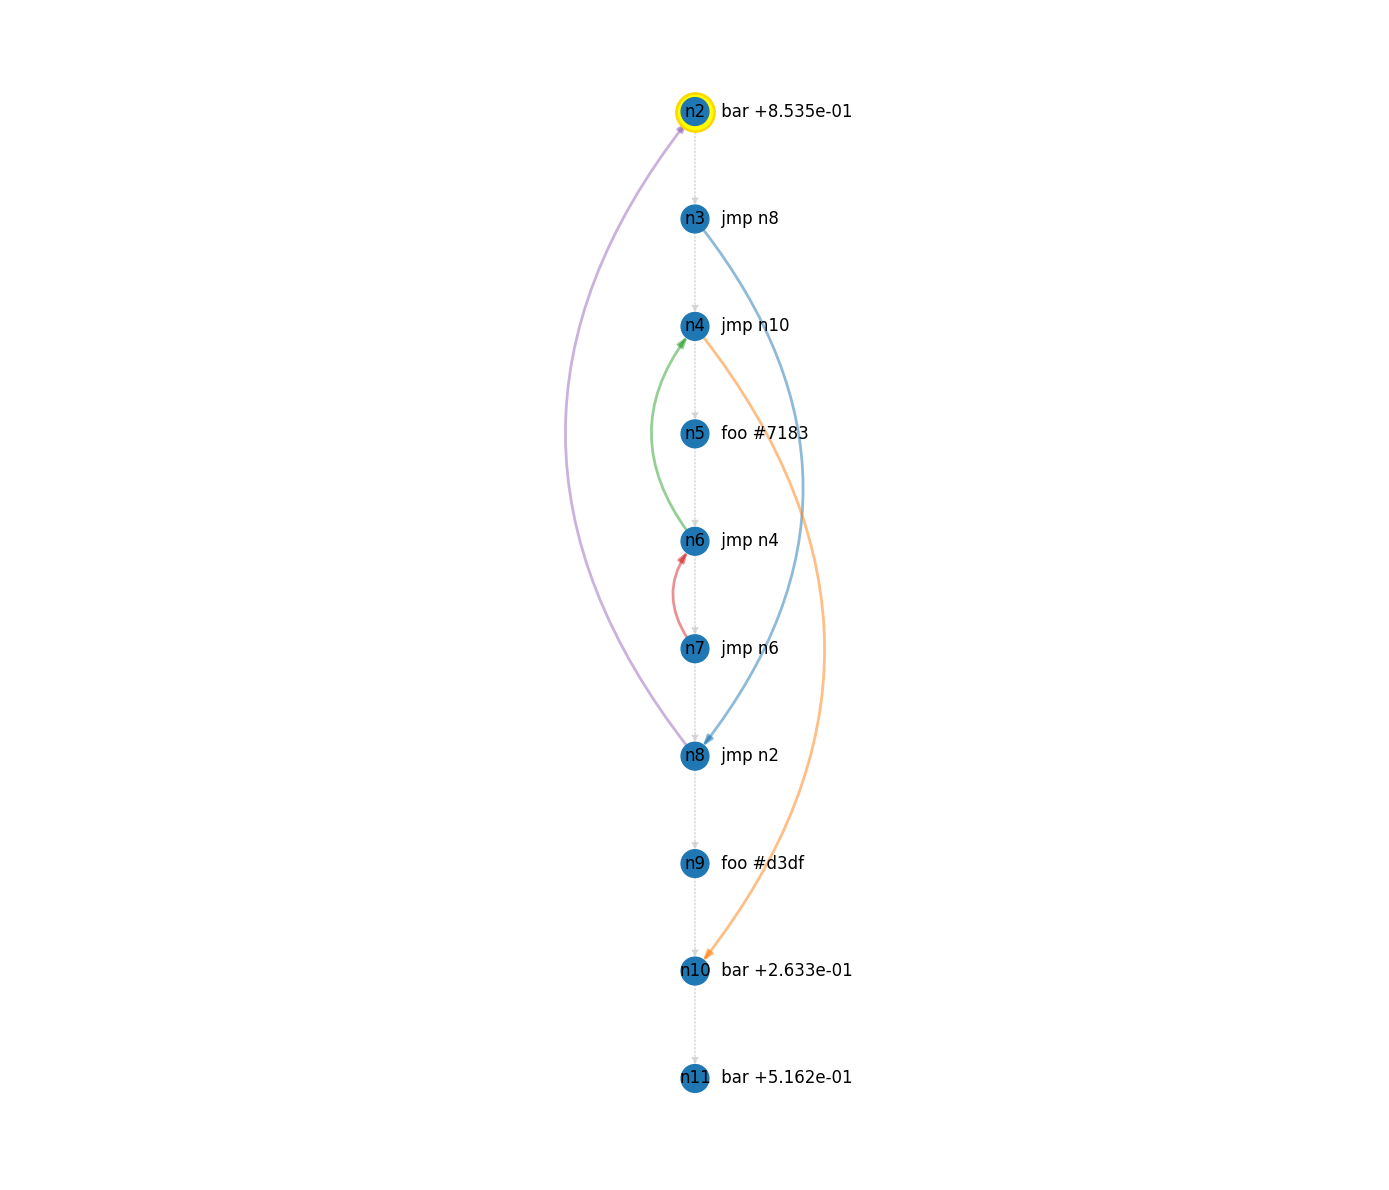

In [5]:
byron.f.as_text(bunch)
byron.f.as_forest(bunch)
byron.f.as_lgp(bunch)

## Label format

By default, if a node is the target of a reference, the `_label` is printed pefore it. The default is `{_node}:\n`, but it may be tweaked in different ways.

In [6]:
byron.f.as_text(byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=5))

; 🖋 n1 ➜ Frame❬MacroArray#2❭
n2:
bar +5.223e-01  ; 🖋 n1.n2 ➜ Macro❬User#2❭
n3:
jmp n6  ; 🖋 n1.n3 ➜ Macro❬User#3❭
jmp n2  ; 🖋 n1.n4 ➜ Macro❬User#3❭
foo #734c  ; 🖋 n1.n5 ➜ Macro❬User#1❭
n6:
jmp n3  ; 🖋 n1.n6 ➜ Macro❬User#3❭


In [7]:
byron.f.as_text(byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=5, extra_parameters={'_label': '<<{_node}>> '}))

; 🖋 n1 ➜ Frame❬MacroArray#3❭
<<n2>> bar +5.223e-01  ; 🖋 n1.n2 ➜ Macro❬User#2❭
<<n3>> jmp n6  ; 🖋 n1.n3 ➜ Macro❬User#3❭
jmp n2  ; 🖋 n1.n4 ➜ Macro❬User#3❭
foo #734c  ; 🖋 n1.n5 ➜ Macro❬User#1❭
<<n6>> jmp n3  ; 🖋 n1.n6 ➜ Macro❬User#3❭


The extra parameters defined in a frame are valid for all successor frames in the syntactic tree

; 🖋 n1 ➜ Frame❬FrameSequence#3❭
; 🖋 n1.n2 ➜ Frame❬FrameSequence#2❭
; 🖋 n1.n2.n3 ➜ Frame❬FrameSequence#1❭
n4:
loop n4  ; 🖋 n1.n2.n3.n4 ➜ Macro❬User#4❭
n5:
loop n5  ; 🖋 n1.n2.n3.n5 ➜ Macro❬User#4❭
n6:
loop n6  ; 🖋 n1.n2.n3.n6 ➜ Macro❬User#4❭
; 🖋 n1.n2.n7 ➜ Frame❬FrameSequence#1❭
n8:
loop n8  ; 🖋 n1.n2.n7.n8 ➜ Macro❬User#4❭
n9:
loop n9  ; 🖋 n1.n2.n7.n9 ➜ Macro❬User#4❭
n10:
loop n10  ; 🖋 n1.n2.n7.n10 ➜ Macro❬User#4❭
; =====================  ; 🖋 n1.n11 ➜ Macro❬Text#1❭
; 🖋 n1.n12 ➜ Frame❬SingleFrame#1❭
; 🖋 n1.n12.n13 ➜ Frame❬FrameSequence#2❭
; 🖋 n1.n12.n13.n14 ➜ Frame❬FrameSequence#1❭
<<<<n15>>>:
loop n15  ; 🖋 n1.n12.n13.n14.n15 ➜ Macro❬User#4❭
<<<<n16>>>:
loop n16  ; 🖋 n1.n12.n13.n14.n16 ➜ Macro❬User#4❭
<<<<n17>>>:
loop n17  ; 🖋 n1.n12.n13.n14.n17 ➜ Macro❬User#4❭
; 🖋 n1.n12.n13.n18 ➜ Frame❬FrameSequence#1❭
<<<<n19>>>:
loop n19  ; 🖋 n1.n12.n13.n18.n19 ➜ Macro❬User#4❭
<<<<n20>>>:
loop n20  ; 🖋 n1.n12.n13.n18.n20 ➜ Macro❬User#4❭
<<<<n21>>>:
loop n21  ; 🖋 n1.n12.n13.n18.n21 ➜ Macro❬User#4❭
; ==

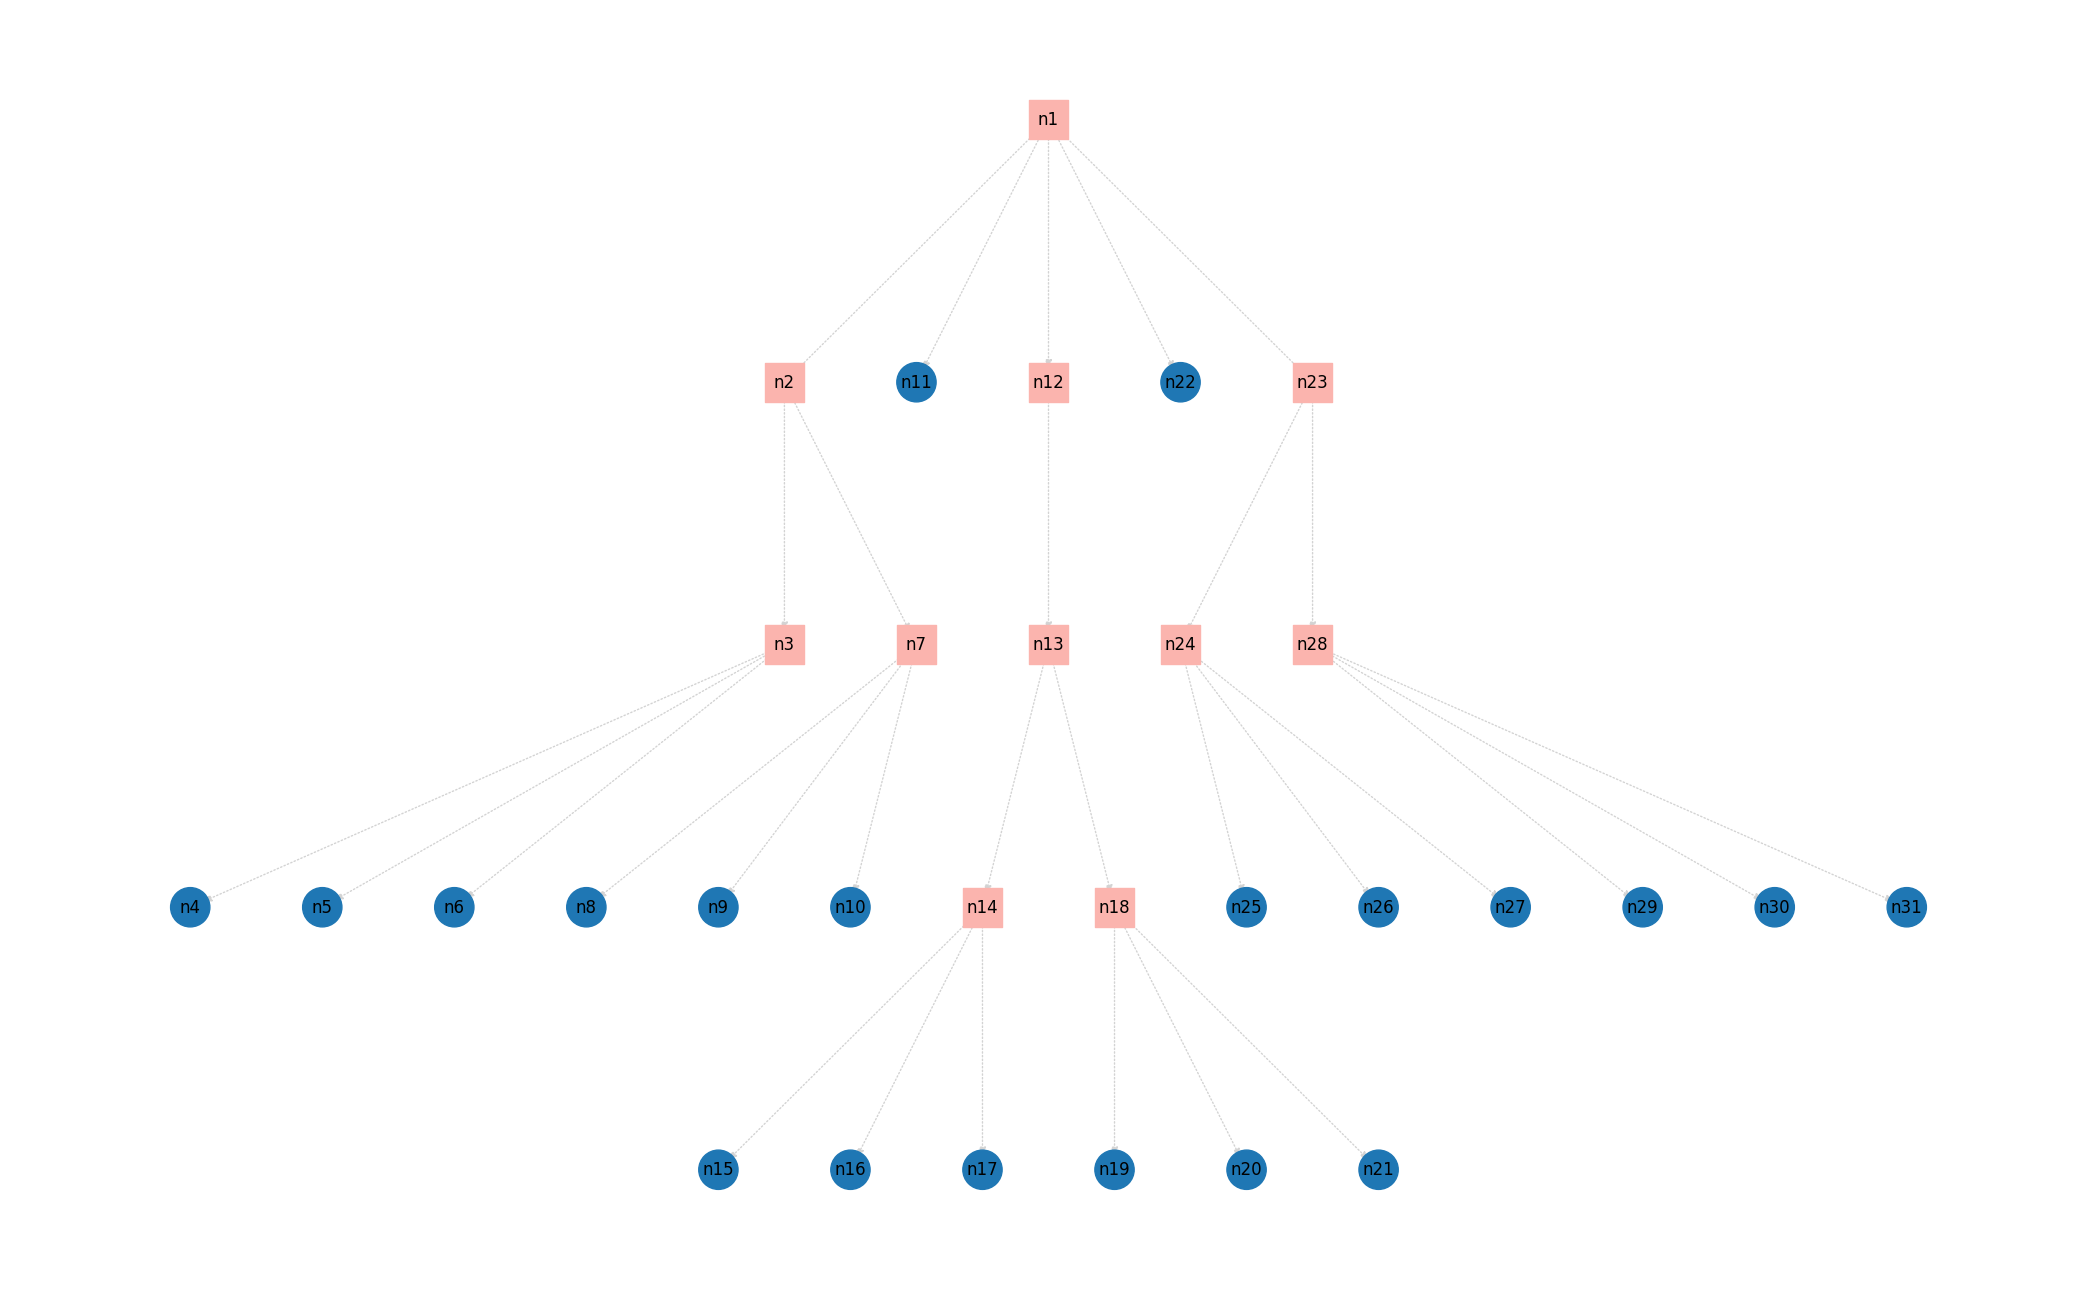

In [8]:
loop = byron.f.macro('loop {me}', me=byron.f.local_reference(backward=False, forward=False))
seq1 = byron.f.sequence([loop, loop, loop])
seq2 = byron.f.sequence([seq1, seq1])
custom = byron.f.sequence([seq2], extra_parameters={'_label': '<<<<{_node}>>>:\n'})
seq3 = byron.f.sequence([seq2, '; =====================', custom, '; =====================', seq2])
byron.f.as_text(seq3)
byron.f.as_forest(seq3)